# Table of Contents

#### 01. Importing Libraries
#### 02. Importing Data
#### 03. Security Implications
#### 04. Customer Behavior by Region
#### 05. Customer Activity Level
#### 06. Price Range Groupings
#### 07. Product Popularity
#### 08. Brand Loyalty
#### 09. Ordering Habits and Loyalty
#### 10. Ordering Habits and Region
#### 11. Ordering Habits and Age/Family Status
#### 12. Customer Profiles
#### 13. Ordering Habits of Different Customer Profiles

# 01. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
# Store path to main project folder
path = r'/Users/emilycurcio/Desktop/CareerFoundry/Data Immersion/Ach 4 Python Fundamentals/03-2024 Instacart Basket Analysis'

In [3]:
# Import latest data set
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

In [4]:
ords_prods_all.shape

(32404859, 32)

In [5]:
pd.options.display.max_columns = None
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_item_spend,spending_flag,median_days_since_prior_order,order_freq_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 03. Security Implications

The Personally Identifiable Information (PII) in this data has been fabricated, however in a real work situaiton it would be important to ask a senior colleague how to handle this. The PII in this data includes first name and last name combined with records on gender, state, age, income, etc. If the first and last names were deleted, there should not be any PII left in the data.

# 04. Customer Behavior by Region

In [6]:
# Define regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',
             'New York', 'Pennsylvania', 'New Jersey']

In [7]:
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska',
           'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [8]:
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
         'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma',
         'Texas', 'Arkansas', 'Louisiana']

In [9]:
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 
        'Oregon', 'California', 'Hawaii']

In [10]:
# Loop through state column to assign region
result = []

for value in ords_prods_all["state"]:
  if value in northeast:
    result.append("Northeast")
  elif value in midwest:
    result.append("Midwest")
  elif value in south:
    result.append("South")
  elif value in west:
    result.append("West")
  else:
    result.append(np.nan)

In [11]:
# Combine result list with df as new column
ords_prods_all['region'] = result

In [12]:
ords_prods_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [13]:
# Look at spending by region
spender_by_region = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [14]:
# Calculate percent of high spenders per region
spender_by_region['% high spender'] = (spender_by_region['High spender'] 
                                       / (spender_by_region['High spender'] + spender_by_region['Low spender'])) * 100

In [15]:
# Calculate percent of low spenders per region
spender_by_region['% low spender'] = (spender_by_region['Low spender'] 
                                       / (spender_by_region['High spender'] + spender_by_region['Low spender'])) * 100

In [16]:
# Number of high vs low spenders in each region
spender_by_region

spending_flag,High spender,Low spender,% high spender,% low spender
region,,,,
Midwest,155968,7441357,2.052933,97.947067
Northeast,108200,5614536,1.890704,98.109296
South,209691,10582194,1.943043,98.056957
West,160354,8132559,1.933627,98.066373


# 05. Customer Activity Level

In [17]:
# Identify low activity customers
ords_prods_all.loc[ords_prods_all['order_number'] < 5, 'customer_activity_flag'] = 'Low activity'

In [18]:
# Identify high activity customers
ords_prods_all.loc[ords_prods_all['order_number'] >= 5, 'customer_activity_flag'] = 'High activity'

In [19]:
ords_prods_all['customer_activity_flag'].value_counts(dropna = False)

High activity    24414877
Low activity      7989982
Name: customer_activity_flag, dtype: int64

In [20]:
high_activity_cust = ords_prods_all[ords_prods_all['customer_activity_flag'] == 'High activity']

In [21]:
high_activity_cust.shape

(24414877, 34)

In [22]:
# Export data to pkl
#high_activity_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cust.pkl'))

# 06. Price Range Groupings

Text(0.5, 1.0, 'Price Range Groupings')

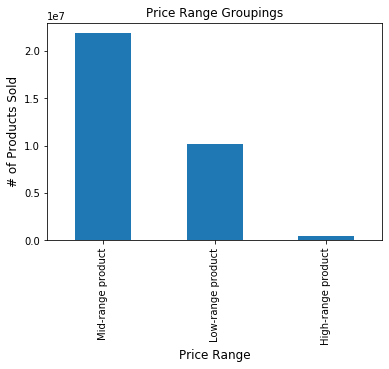

In [23]:
# Bar chart of price ranges
bar = ords_prods_all['price_range_loc'].value_counts().plot.bar()

plt.ylabel('# of Products Sold', fontsize = 12)
plt.xlabel('Price Range', fontsize = 12)
plt.title('Price Range Groupings', fontsize = 12)

In [24]:
# Export as png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_groupings.png'), bbox_inches = 'tight')

# 07. Product Popularity

Text(0.5, 1.0, 'Product Popularity')

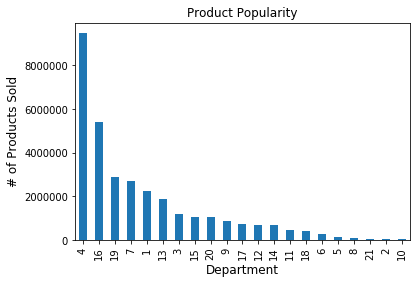

In [25]:
# Bar chart of sales per departments
bar2 = ords_prods_all['department_id'].value_counts().plot.bar()

plt.ylabel('# of Products Sold', fontsize = 12)
plt.xlabel('Department', fontsize = 12)
plt.title('Product Popularity', fontsize = 12)

In [26]:
# Export as png
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_popularity.png'), bbox_inches = 'tight')

# 08. Brand Loyalty

Text(0.5, 1.0, 'How Often Users Return')

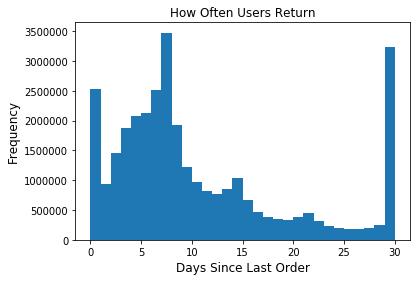

In [27]:
# Create histogram of order_hour_of_day
hist = ords_prods_all['days_since_prior_order'].plot.hist(bins = 30)

plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Days Since Last Order', fontsize = 12)
plt.title('How Often Users Return', fontsize = 12)

In [28]:
# Export as png
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_brand_loyalty.png'), bbox_inches = 'tight')

# 09. Ordering Habits and Loyalty

In [29]:
# Create a crosstab
order_habits_loyalty = pd.crosstab(ords_prods_all['orders_day_of_week'], ords_prods_all['loyalty_flag'], dropna = False)

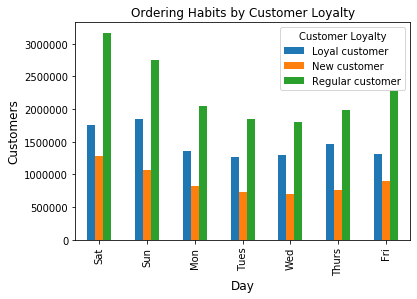

In [30]:
# Bar plot using the crosstab data
bar3 = order_habits_loyalty.plot(kind = 'bar', stacked = False)

plt.ylabel('Customers', fontsize = 12)
plt.xlabel('Day', fontsize = 12)
plt.title('Ordering Habits by Customer Loyalty', fontsize = 12)

plt.xticks(np.arange(7), ['Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])
plt.legend(title = 'Customer Loyalty')

In [31]:
# Export as png
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_habits_loyalty.png'), bbox_inches = 'tight')

# 10. Ordering Habits and Region

In [32]:
# Create a crosstab
order_habits_region = pd.crosstab(ords_prods_all['orders_day_of_week'], ords_prods_all['region'], dropna = False)

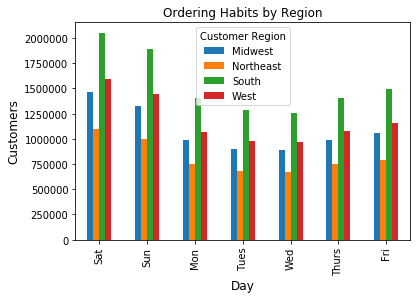

In [33]:
# Bar plot using the crosstab data
bar4 = order_habits_region.plot(kind = 'bar', stacked = False)

plt.ylabel('Customers', fontsize = 12)
plt.xlabel('Day', fontsize = 12)
plt.title('Ordering Habits by Region', fontsize = 12)

plt.xticks(np.arange(7), ['Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])
plt.legend(title = 'Customer Region')

In [34]:
# Export as png
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_habits_region.png'), bbox_inches = 'tight')

# 11. Ordering Habits and Age/Family Status

In [35]:
# Create new column called age group that groups people into 3 age groups
ords_prods_all.loc[(ords_prods_all['age'] >= 18) & (ords_prods_all['age'] <= 39), 'age_group'] = 'Young adult'

In [36]:
ords_prods_all.loc[(ords_prods_all['age'] >= 40) & (ords_prods_all['age'] <= 59), 'age_group'] = 'Middle adult'

In [37]:
ords_prods_all.loc[ords_prods_all['age'] >= 60, 'age_group'] = 'Old adult'

In [38]:
ords_prods_all['age_group'].value_counts(dropna = False)

Young adult     11164192
Old adult       11067255
Middle adult    10173412
Name: age_group, dtype: int64

In [39]:
# Creat new column that combines fam_status and age_group
ords_prods_all['fam_status_age'] = ords_prods_all["fam_status"] + ' ' + ords_prods_all["age_group"]

Text(0.5, 1.0, 'Ordering Habits by Family Status + Age')

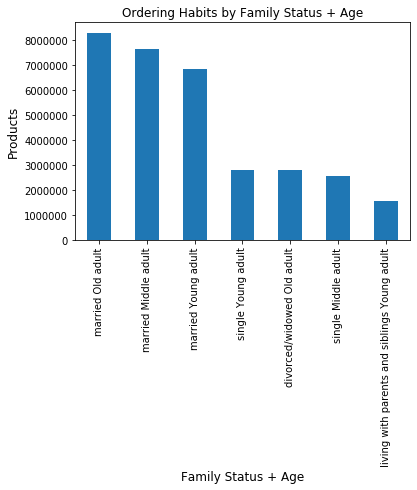

In [40]:
# Create bar chart
bar5 = ords_prods_all['fam_status_age'].value_counts().plot.bar()

plt.ylabel('Products', fontsize = 12)
plt.xlabel('Family Status + Age', fontsize = 12)
plt.title('Ordering Habits by Family Status + Age', fontsize = 12)

In [41]:
# Export as png
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_status_age.png'), bbox_inches = 'tight')

# 12. Customer Profiles

In [42]:
# Create new column called income_class
ords_prods_all.loc[ords_prods_all['income'] <= 30000, 'income_class'] = 'Lower class'

In [43]:
ords_prods_all.loc[(ords_prods_all['income'] >= 30001) & (ords_prods_all['income'] <= 58020), 'income_class'] = 'Lower middle class'

In [44]:
ords_prods_all.loc[(ords_prods_all['income'] >= 58021) & (ords_prods_all['income'] <= 94000), 'income_class'] = 'Middle class'

In [45]:
ords_prods_all.loc[(ords_prods_all['income'] >= 94001) & (ords_prods_all['income'] <= 153000), 'income_class'] = 'Upper middle class'

In [46]:
ords_prods_all.loc[ords_prods_all['income'] >= 153001, 'income_class'] = 'Lower middle class'

In [47]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_item_spend,spending_flag,median_days_since_prior_order,order_freq_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_activity_flag,age_group,fam_status_age,income_class
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Low activity,Young adult,married Young adult,Lower middle class
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Low activity,Young adult,married Young adult,Lower middle class
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Low activity,Young adult,married Young adult,Lower middle class
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Low activity,Young adult,married Young adult,Lower middle class
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Young adult,married Young adult,Lower middle class


Text(0.5, 1.0, 'Age Groups')

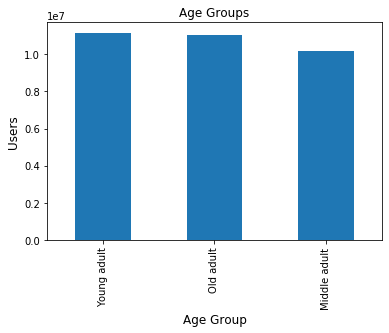

In [48]:
# AGE PROFILE
bar6 = ords_prods_all['age_group'].value_counts().plot.bar()

plt.ylabel('Users', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)
plt.title('Age Groups', fontsize = 12)

In [49]:
# Export as png
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_groups.png'), bbox_inches = 'tight')

Text(0.5, 1.0, 'Family Status')

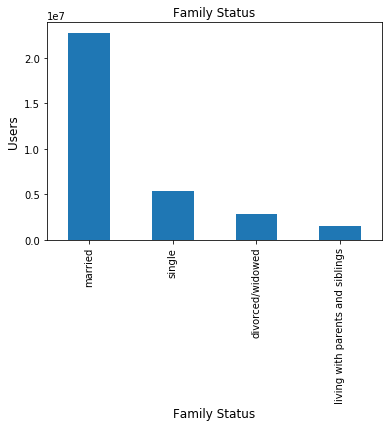

In [50]:
# FAMILY STATUS PROFILE
bar7 = ords_prods_all['fam_status'].value_counts().plot.bar()

plt.ylabel('Users', fontsize = 12)
plt.xlabel('Family Status', fontsize = 12)
plt.title('Family Status', fontsize = 12)

In [51]:
# Export as png
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status.png'), bbox_inches = 'tight')

Text(0.5, 1.0, 'Income Classes')

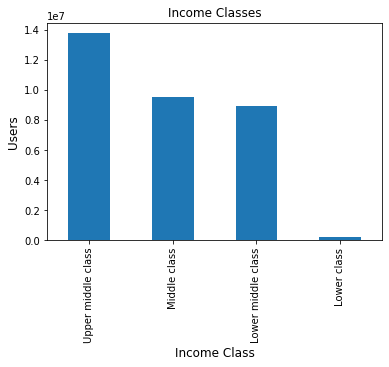

In [52]:
# INCOME PROFILE
bar7 = ords_prods_all['income_class'].value_counts().plot.bar()

plt.ylabel('Users', fontsize = 12)
plt.xlabel('Income Class', fontsize = 12)
plt.title('Income Classes', fontsize = 12)

In [53]:
# Export as png
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_classes.png'), bbox_inches = 'tight')

# 13. Ordering Habits of Different Customer Profiles

## 13.1 Department habits of different customer profiles

In [54]:
# Create subset of data including only TOP 3 DEPARTMENTS
top_departments = ords_prods_all.loc[ords_prods_all['department_id'].isin([4, 16, 19])]

In [55]:
# Crosstab of top departments and AGE groups
top_dep_age = pd.crosstab(top_departments['age_group'], top_departments['department_id'], dropna = False)

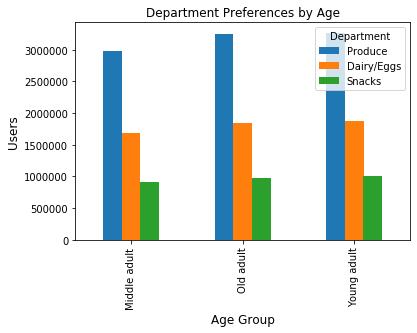

In [56]:
# Bar chart of top departments by age group
bar8 = top_dep_age.plot(kind = 'bar', stacked = False)

plt.ylabel('Users', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)
plt.title('Department Preferences by Age', fontsize = 12)

plt.legend(title = 'Department', labels = ['Produce', 'Dairy/Eggs', 'Snacks'])

In [57]:
# Export as png
bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_age.png'), bbox_inches = 'tight')

In [58]:
# Crosstab of top departments and FAMILY STATUS
top_dep_fam_status = pd.crosstab(top_departments['fam_status'], top_departments['department_id'], dropna = False)

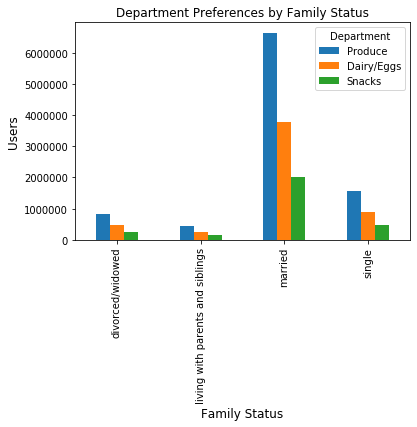

In [59]:
# Bar chart of top departments by family status
bar9 = top_dep_fam_status.plot(kind = 'bar', stacked = False)

plt.ylabel('Users', fontsize = 12)
plt.xlabel('Family Status', fontsize = 12)
plt.title('Department Preferences by Family Status', fontsize = 12)

plt.legend(title = 'Department', labels = ['Produce', 'Dairy/Eggs', 'Snacks'])

In [60]:
# Export as png
bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_fam.png'), bbox_inches = 'tight')

In [61]:
# Crosstab of top departments and INCOME
top_dep_income = pd.crosstab(top_departments['income_class'], top_departments['department_id'], dropna = False)

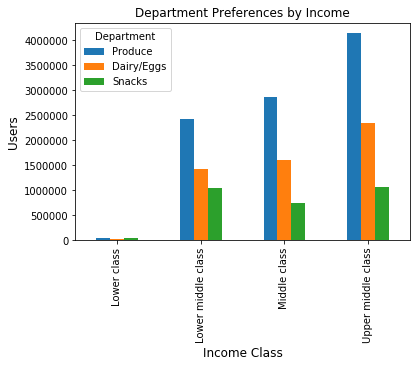

In [62]:
# Bar chart of top departments by income class
bar10 = top_dep_income.plot(kind = 'bar', stacked = False)

plt.ylabel('Users', fontsize = 12)
plt.xlabel('Income Class', fontsize = 12)
plt.title('Department Preferences by Income', fontsize = 12)

plt.legend(title = 'Department', labels = ['Produce', 'Dairy/Eggs', 'Snacks'])

In [63]:
# Export as png
bar10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_income.png'), bbox_inches = 'tight')

## 13.2 Spending habits of different customer profiles

In [64]:
# Crosstab of spending and AGE
spending_age = pd.crosstab(ords_prods_all['age_group'], ords_prods_all['price_range_loc'], dropna = False)

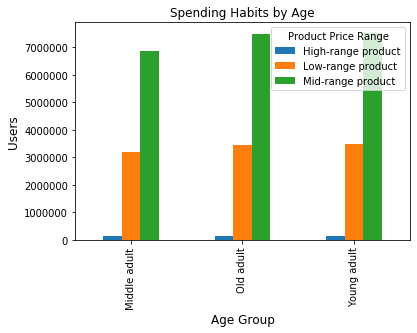

In [65]:
# Bar chart of spending by age
bar11 = spending_age.plot(kind = 'bar', stacked = False)

plt.ylabel('Users', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)
plt.title('Spending Habits by Age', fontsize = 12)

plt.legend(title = 'Product Price Range')

In [66]:
# Crosstab of spending and FAMILY STATUS
spending_fam = pd.crosstab(ords_prods_all['fam_status'], ords_prods_all['price_range_loc'], dropna = False)

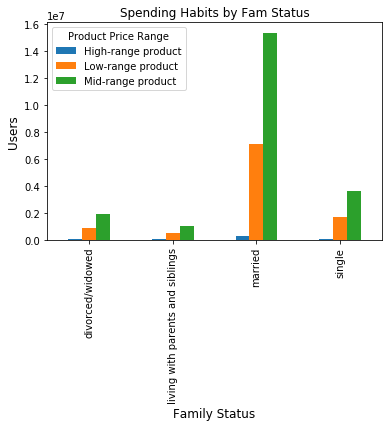

In [67]:
# Bar chart of spending by family status
bar12 = spending_fam.plot(kind = 'bar', stacked = False)

plt.ylabel('Users', fontsize = 12)
plt.xlabel('Family Status', fontsize = 12)
plt.title('Spending Habits by Fam Status', fontsize = 12)

plt.legend(title = 'Product Price Range')

In [68]:
# Crosstab of spending and INCOME
spending_income = pd.crosstab(ords_prods_all['income_class'], ords_prods_all['price_range_loc'], dropna = False)

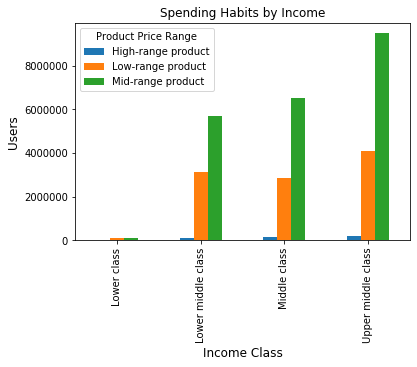

In [69]:
# Bar chart of spending by income
bar13 = spending_income.plot(kind = 'bar', stacked = False)

plt.ylabel('Users', fontsize = 12)
plt.xlabel('Income Class', fontsize = 12)
plt.title('Spending Habits by Income', fontsize = 12)

plt.legend(title = 'Product Price Range')

# 14. Export Final Data

In [70]:
# Export data to pkl
ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all_v2.pkl'))